In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy import stats

Data set:
https://drive.google.com/open?id=1oPpVV8A_bROfReZCQP2AfgR3zIL_WeiA

(From Kaggle)-- https://www.kaggle.com/gilsousa/habermans-survival-data-set

Description:-
https://drive.google.com/open?id=1ee_Ux01UTqZOGQG4GP_FDDhUKWXj1-PF

Attribute Information:
   1. Age of patient at time of operation (numerical)
   2. Patient's year of operation (year numerical)
   3. Number of positive axillary nodes detected (numerical)
   4. Survival status (class attribute)
         1 = the patient survived 5 years or longer
         2 = the patient died within 5 year

### Analyse the above linked dataset as like iris data.

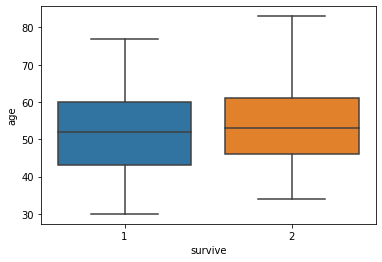

In [265]:
sns.boxplot(x='survive',y='age',data=haberman)

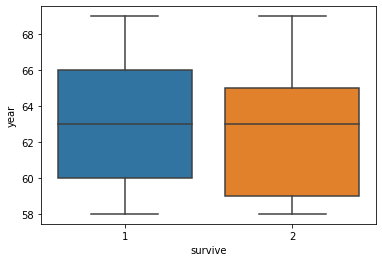

In [270]:
sns.boxplot(x='survive',y='year',data=haberman)

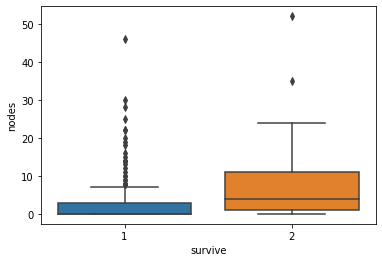

In [269]:
sns.boxplot(x='survive',y='nodes',data=haberman)

In [271]:
haberman['nodes'].unique()

array([ 1,  3,  0,  2,  4, 10,  9, 30,  7, 13,  6, 15, 21, 11,  5, 23,  8,
       20, 52, 14, 19, 16, 12, 24, 46, 18, 22, 35, 17, 25, 28],
      dtype=int64)

In [ ]:
plt.dis

In [64]:
haberman=pd.read_csv('haberman.csv')
haberman

,age,year,nodes,survive
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


In [272]:
haberman.describe()

,age,year,nodes,survive
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [260]:
haberman['survive'].unique()

array([1, 2], dtype=int64)

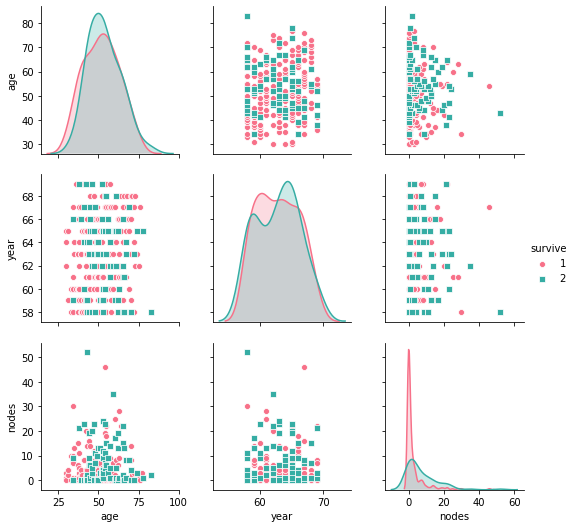

In [283]:
sns.pairplot(haberman,vars = ["age", "year", "nodes"],hue='survive',palette="husl",markers=["o", "s"])

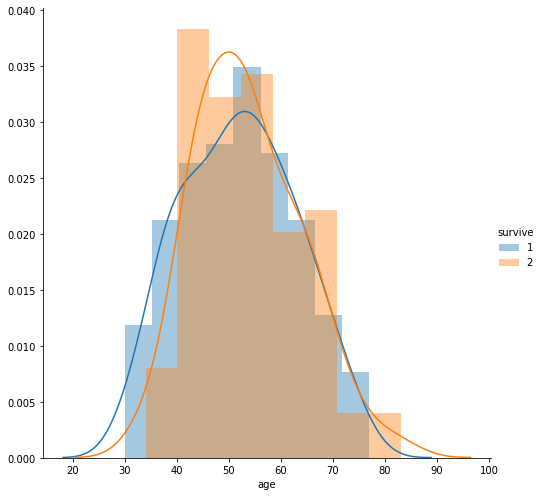

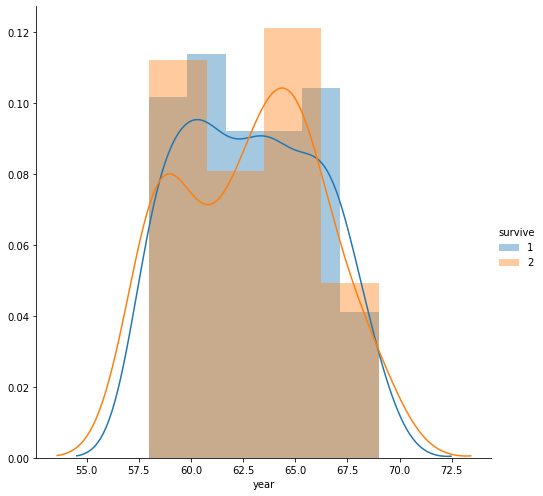

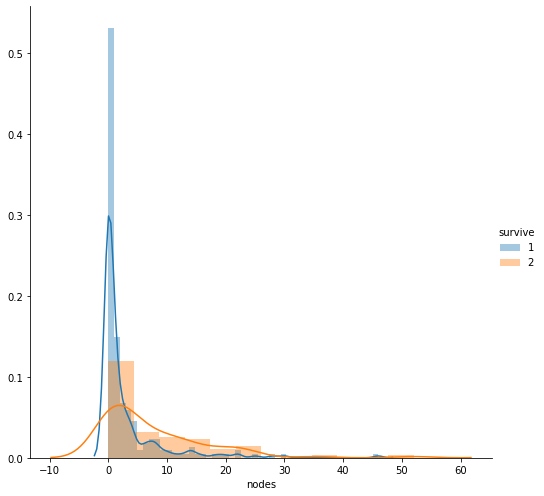

In [262]:
sns.FacetGrid(haberman,hue='survive',height=7).map(sns.distplot,'age').add_legend()
sns.FacetGrid(haberman,hue='survive',height=7).map(sns.distplot,'year').add_legend()
sns.FacetGrid(haberman,hue='survive',height=7).map(sns.distplot,'nodes').add_legend()

Q1-- Plot Histogram for all fearutes of the data set and write comments on which feature is best for predicting survival status.

(Hint: Use same process as did in iris data set.)

In [4]:
#Write your code here for ploting--

In [5]:
# Write your comments here--

Q2-- On the ipl wala dataset create a function which will accept a batsman name and 1 interger value and returns the number of runs he has after those many matches

E.g Input (V Kohli, 18)

Output - 678(Runs scored by Virat Kohli after 18 matches

In [6]:
# Give your comments here

In [7]:
match=pd.read_csv("matches.csv")
delivery=pd.read_csv("deliveries.csv")

In [8]:
mega=match.merge(delivery,left_on='id',right_on='match_id')

In [195]:
def batsman_runs_after(batsman,matches=0):
    print( delivery[delivery['batsman']==batsman].groupby('match_id').sum()['batsman_runs'].reset_index().iloc[0:matches].sum()['batsman_runs'], 'runs scored by',batsman,'after',matches,'matches' )

In [196]:
batsman_runs_after('V Kohli',18)

401 runs scored by V Kohli after 18 matches


In [201]:
batsman_runs_after('DA Warner',25)

1007 runs scored by DA Warner after 25 matches


In [204]:
batsman_runs_after('MS Dhoni',20)

462 runs scored by MS Dhoni after 20 matches


Q3: Write a function which will plot the match wise scores of two batsman in the form of a PDF, check this [image](https://drive.google.com/open?id=18y9DiuVvNZ3p5LIBv-eaDVxNtXrI7hp9)
<img src=""/>

In [275]:
def plot_scores(batsman1,batsman2):
    df=delivery[(delivery['batsman']=='V Kohli') | (delivery['batsman']=='DA Warner')]
    df=df.groupby(['batsman','match_id']).sum().reset_index()
    
    sns.FacetGrid(df,hue='batsman',size=7).map(sns.distplot,'batsman_runs').add_legend()
    plt.xlabel('Runs Scored')
    plt.show()

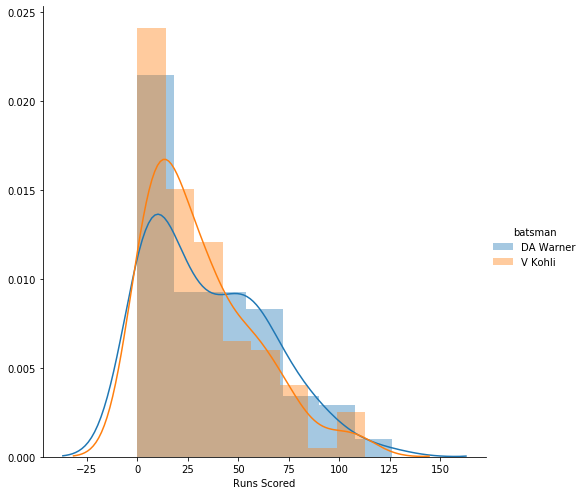

In [276]:
plot_scores('V Kohli','DA Warner')

Q4-- Write a function which will take a list as input and in return plot PDF and CDF curve as like in IRIS one.

     (you have to write your on logic for np.cumsum()--(cummulative sum- function) )

In [205]:
# Write your code here--

In [206]:
def cum_sum(l):
    
    cumsum=[l[0]]
    for i in l[1:]:
        cumsum.append( cumsum[-1] + i )
    
    return cumsum

In [207]:
def plot_pdf_cdf(l):
    
    counts,bin_edges=np.histogram(l,bins=10)

    pdf=counts/sum(counts)
    cdf=cum_sum(pdf)
    
    plt.plot(bin_edges[1:],pdf,label='pdf')
    plt.plot(bin_edges[1:],cdf,label='cdf')
    plt.legend()
    plt.show()

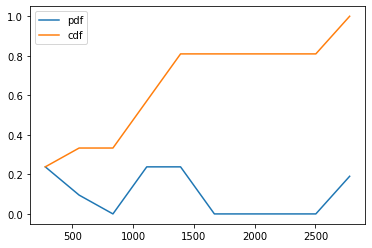

In [208]:
plot_pdf_cdf(l1)

In [219]:
iris=pd.read_csv('Iris.csv')

In [241]:
setosa=iris[iris['Species']=='Iris-setosa']

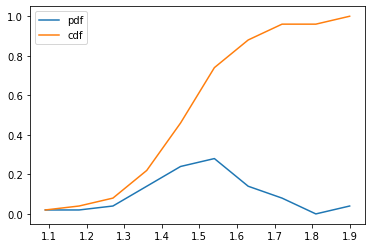

In [242]:
plot_pdf_cdf(setosa['PetalLengthCm'])